<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview
This notebook contains the step by step approach undertaken to build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores; a large Ecuadorian-based grocery retailer.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [4]:
# pip install pandas
# pip install numpy 
# pip install matplotlib
# pip install seaborn 
# pip install forex_python
# pip install babel 
# pip install seaborn
# pip install pandas-profiling 

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [9]:
# Data handling
import pandas as pd
import numpy as np
from statistics import mean
from forex_python.converter import CurrencyRates
from babel.numbers import format_currency
import datetime as dt

# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode
from scipy.stats import ttest_ind


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import plot
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go

# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine learning libraries and metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score,roc_curve, auc,roc_auc_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
import joblib
from sklearn.pipeline import Pipeline
import pickle
# Other packages
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import warnings
warnings.filterwarnings('ignore')
import patoolib


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [6]:
holidaysurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/holidays_events.csv"
oilurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/oil.csv"
storesurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/stores.csv"
testurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/test.csv"
trainurl="https://github.com/Gilbert-B/Regression-Project/releases/download/data/train.csv"
transactionsurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/transactions.csv"

In [7]:
test_df = pd.read_csv(testurl,error_bad_lines=False)
train_df= pd.read_csv(trainurl,error_bad_lines=False)
holidays_df= pd.read_csv(holidaysurl,error_bad_lines=False)
transaction_df= pd.read_csv(transactionsurl,error_bad_lines=False)
stores_df= pd.read_csv(storesurl,error_bad_lines=False)
oil_df= pd.read_csv(oilurl,error_bad_lines=False)

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

### Test Data Set

In [12]:
# A quick look at the shape of our test dataset

test_df.shape

(28512, 5)

In [13]:
#Looking at the head and tail of our dataset

test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [14]:
test_df.tail()

,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


In [16]:
#Look at the columns in the test dataset and their data types

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [17]:
#Get more details about the features of our data
test_df.describe()

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


In [18]:
#Check for missing values
test_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

<AxesSubplot: >

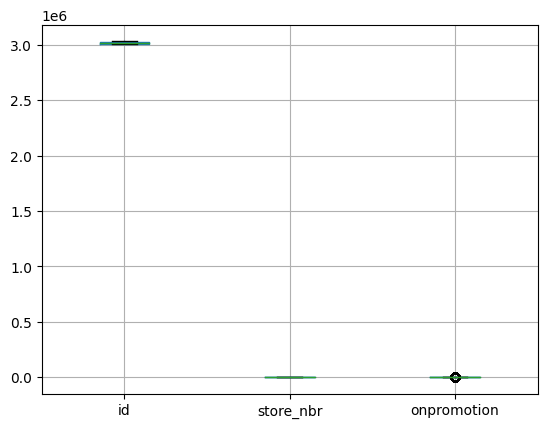

In [19]:
#Check for outliers
test_df.boxplot()

### Train Data Set

In [20]:
# A quick look at the shape of our train dataset

train_df.shape

(3000888, 6)

In [21]:
#Looking at the head and tail of our dataset

train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [22]:
train_df.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [23]:
#Look at the columns in the test dataset and their data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [24]:
#Get more details about the features of our data
train_df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [25]:
#Check for missing values
train_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

<AxesSubplot: >

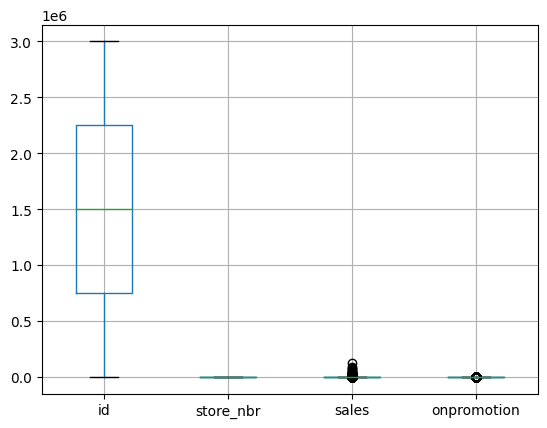

In [26]:
#Check for outliers
train_df.boxplot()

### Holidays Data Set

In [29]:
# A quick look at the shape of our holiday dataset

holidays_df.shape

(350, 6)

In [30]:
#Looking at the head and tail of our dataset

holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [31]:
holidays_df.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [32]:
#Look at the columns in the holidays dataset and their data types

holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [33]:
#Get more details about the features of our data
holidays_df.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


In [34]:
#Check for missing values
holidays_df.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

<AxesSubplot: >

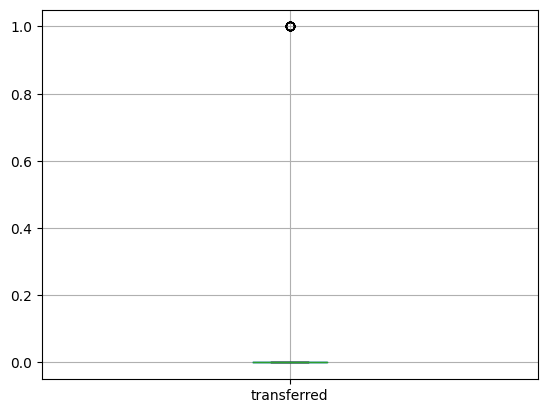

In [35]:
#Check for outliers
holidays_df.boxplot()

### Transactions Data Set

In [37]:
# A quick look at the shape of our transactions dataset

transaction_df.shape

(83488, 3)

In [38]:
#Looking at the head and tail of our dataset

transaction_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [39]:
transaction_df.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [40]:
#Look at the columns in the transactionss dataset and their data types

transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [41]:
#Get more details about the features of our data
transaction_df.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [42]:
#Check for missing values
transaction_df.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

<AxesSubplot: >

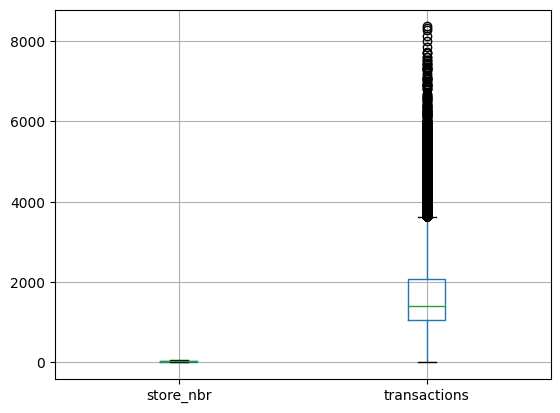

In [43]:
#Check for outliers
transaction_df.boxplot()

### Oil Data Set

In [44]:
# A quick look at the shape of our oil dataset

oil_df.shape

(1218, 2)

In [45]:
#Looking at the head and tail of our dataset
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [46]:
oil_df.tail()

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [47]:
#Look at the columns in the oil dataset and their data types

oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [48]:
#Get more details about the features of our data
oil_df.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [49]:
#Check for missing values
oil_df.isna().sum()

date           0
dcoilwtico    43
dtype: int64

<AxesSubplot: >

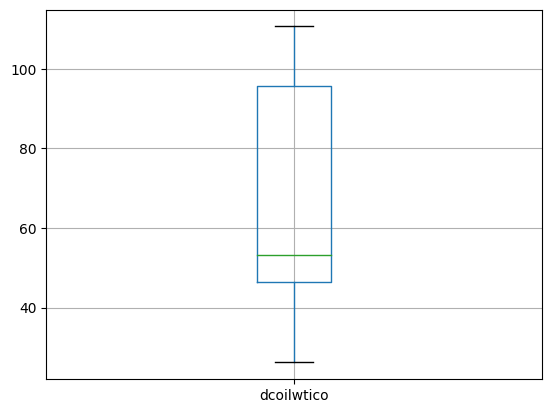

In [50]:
#Check for outliers
oil_df.boxplot()

### Stores Dataset

In [51]:
# A quick look at the shape of our stores dataset

stores_df.shape

(54, 5)

In [52]:
#Looking at the head and tail of our dataset
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [53]:
stores_df.tail()

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [54]:
#Look at the columns in the stores dataset and their data types

stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [55]:
#Get more details about the features of our data
stores_df.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [56]:
#Check for missing values
stores_df.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

<AxesSubplot: >

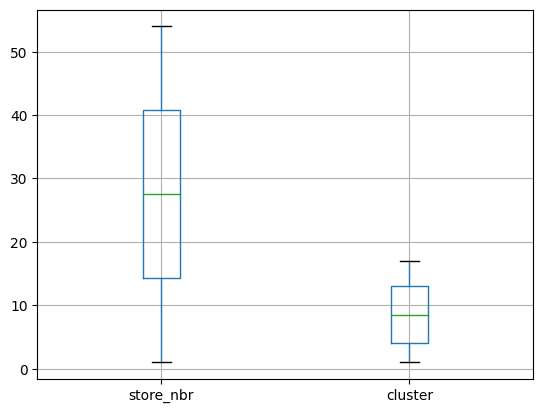

In [57]:
#Check for outliers
stores_df.boxplot()

## Questions 

Is the train dataset complete (has all the required dates)?

Which dates have the lowest and highest sales for each year?

Did the earthquake impact sales?

Are certain groups of stores selling more products? (Cluster, city, state, type)

Are sales affected by promotions, oil prices and holidays?

What analysis can we get from the date and its extractable features?

What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

Does the demographics of a store affect sales?

Does the fluctuation in oil prices affect sales of products? 

Do pay days affect sales?


# Hypothesis

Null Hypothesis :Change in oil prices has a corresponding effect on sales 

Alternate Hypothesis :Change in oil prices  does not have a corresponding effect on sales

# Issues with the data

1. Oil data has some missing values 
2. The whole data set need to be combined into one file 

# How to handle the issues

1. Deal with missing data by repplace all nullvalues with the mean value 
2. Combine the data sets to get a a single data set for analysis 

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

### Drop Duplicates

In [58]:
# Use pandas.DataFrame.drop_duplicates method
train_df.duplicated().any(), 
stores_df.duplicated().any(), 
oil_df.duplicated().any(),  
test_df.duplicated().any(),  
holidays_df.duplicated().any() 

False

There arent any duplicates

### Impute Missing Values 

From our data viewing we find out that some of the values missing in our oil datset 

In [59]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date           0
dcoilwtico    43
dtype: int64

In [60]:
#Filling missing values in oil data with the the value before that missing data
oil_df = oil_df.bfill()

In [61]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date          0
dcoilwtico    0
dtype: int64

Missing Values have been dealt

In [11]:
# filling the null values  according to the next observed value
dfoil= dfoil.ffill()

In [12]:
# filling the null values  according to the previous observed value
dfoil= dfoil.bfill()

## Merge Data 

In [13]:
dftransactions.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [14]:
dfholiday.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [15]:
dftrain.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [16]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [17]:
# convert the date to datetype 

dftrain["date"] = pd.to_datetime(dftrain["date"])

Transactions, train & Holiday have a common feature; Date so lets merge the three 

In [18]:
#merging transactions & Holiday
dfnew = pd.merge (pd.merge (dftransactions, dfholiday,how="outer", on=["date"] ),dftrain, how ="outer", on= ["date","store_nbr"])
dfnew

C:\Users\GilB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\GilB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,date,store_nbr,transactions,type,locale,locale_name,description,transferred,id,family,sales,onpromotion
0,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,561.0,AUTOMOTIVE,0.0,0.0
1,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,562.0,BABY CARE,0.0,0.0
2,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,563.0,BEAUTY,2.0,0.0
3,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,564.0,BEVERAGES,810.0,0.0
4,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,565.0,BOOKS,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3051079,2017-04-19,52.0,NaN,NaN,NaN,NaN,NaN,NaN,2790409.0,POULTRY,0.0,0.0
3051080,2017-04-19,52.0,NaN,NaN,NaN,NaN,NaN,NaN,2790410.0,PREPARED FOODS,0.0,0.0
3051081,2017-04-19,52.0,NaN,NaN,NaN,NaN,NaN,NaN,2790411.0,PRODUCE,0.0,0.0
3051082,2017-04-19,52.0,NaN,NaN,NaN,NaN,NaN,NaN,2790412.0,SCHOOL AND OFFICE SUPPLIES,0.0,0.0


In [19]:
dfoil.head(5)

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [20]:
#lets merge oil df to our new df dftranholiday
dfnew2 = pd.merge (dfnew,dfoil, how ="outer", on =["date"])
dfnew2

C:\Users\GilB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\GilB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,date,store_nbr,transactions,type,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico
0,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,561.0,AUTOMOTIVE,0.0,0.0,93.14
1,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,562.0,BABY CARE,0.0,0.0,93.14
2,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,563.0,BEAUTY,2.0,0.0,93.14
3,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,564.0,BEVERAGES,810.0,0.0,93.14
4,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,565.0,BOOKS,0.0,0.0,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051090,2017-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.65
3051091,2017-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.40
3051092,2017-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.46
3051093,2017-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.96


In [21]:
dfstores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


#### finally lets merge the stores data to the new df to get our final data set 

In [22]:
df = pd.merge (dfnew2,dfstores,how ="outer", on =["store_nbr"])
df

C:\Users\GilB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\GilB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,date,store_nbr,transactions,type_x,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,561.0,AUTOMOTIVE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
1,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,562.0,BABY CARE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
2,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,563.0,BEAUTY,2.0,0.0,93.14,Salinas,Santa Elena,D,1.0
3,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,564.0,BEVERAGES,810.0,0.0,93.14,Salinas,Santa Elena,D,1.0
4,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,565.0,BOOKS,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051090,2017-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.65,NaN,NaN,NaN,NaN
3051091,2017-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.40,NaN,NaN,NaN,NaN
3051092,2017-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.46,NaN,NaN,NaN,NaN
3051093,2017-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.96,NaN,NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051095 entries, 0 to 3051094
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     float64       
 2   transactions  float64       
 3   type_x        object        
 4   locale        object        
 5   locale_name   object        
 6   description   object        
 7   transferred   object        
 8   id            float64       
 9   family        object        
 10  sales         float64       
 11  onpromotion   float64       
 12  dcoilwtico    float64       
 13  city          object        
 14  state         object        
 15  type_y        object        
 16  cluster       float64       
dtypes: datetime64[ns](1), float64(7), object(9)
memory usage: 419.0+ MB


### Lets clean our new df

## Drop Duplicates

##### first lets look at the rows where majority of the columns are null. We will remove these rows from our analysis 

In [24]:
ndf = df

In [25]:
# Checking for duplicated rows
df.duplicated().sum()

0

## Impute Missing Values

### Date Column 

In [26]:

df["date"].isnull().sum()

0

### store-nbr

In [27]:
df["store_nbr"].isnull().sum()

80

In [28]:
# Lets extract the null rows in the store_nbr colum
df[df["store_nbr"].isnull()]

,date,store_nbr,transactions,type_x,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
3051015,2012-03-02,NaN,NaN,Holiday,Local,Manta,Fundacion de Manta,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051016,2012-04-01,NaN,NaN,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051017,2012-04-12,NaN,NaN,Holiday,Local,Cuenca,Fundacion de Cuenca,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051018,2012-04-14,NaN,NaN,Holiday,Local,Libertad,Cantonizacion de Libertad,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051019,2012-04-21,NaN,NaN,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051090,2017-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.65,NaN,NaN,NaN,NaN
3051091,2017-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.40,NaN,NaN,NaN,NaN
3051092,2017-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.46,NaN,NaN,NaN,NaN
3051093,2017-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.96,NaN,NaN,NaN,NaN


#### After observing the rows carefully, the NaN values in the store_nbr are present because there were no transcations during those date. They were created as a result of the merge. Hence, we can simply replace those NaN values with N/A


In [29]:
df["store_nbr"]= df["store_nbr"].replace(np.nan, "N/A")

In [30]:
df["store_nbr"].tail(5)

3051090    N/A
3051091    N/A
3051092    N/A
3051093    N/A
3051094    N/A
Name: store_nbr, dtype: object

### transactions

In [31]:
df['transactions'].isnull().sum()

245864

##### The null valuse in transactions column were also created as a result of the merge. It has the same number of rows as the store_nbr null values. We can deduce that there were no transactiosn on those dates .Hence, we can simply replace those NaN values with N/A

In [32]:
df["transactions"]=df["transactions"].replace(np.nan, "N/A")

In [33]:
df["transactions"].tail()

3051090    N/A
3051091    N/A
3051092    N/A
3051093    N/A
3051094    N/A
Name: transactions, dtype: object

### type_x

In [34]:
# type_x column referes to the type of day it is. Lets first check the contents of the column

df["type_x"].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [35]:
# from the code above, we notice that there are nan values. Lets extrart these days and take a look at them 
df[df["type_x"].isnull()]

,date,store_nbr,transactions,type_x,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
33,2013-01-02,25.0,1038.0,NaN,NaN,NaN,NaN,NaN,2343.0,AUTOMOTIVE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
34,2013-01-02,25.0,1038.0,NaN,NaN,NaN,NaN,NaN,2344.0,BABY CARE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
35,2013-01-02,25.0,1038.0,NaN,NaN,NaN,NaN,NaN,2345.0,BEAUTY,4.0,0.0,93.14,Salinas,Santa Elena,D,1.0
36,2013-01-02,25.0,1038.0,NaN,NaN,NaN,NaN,NaN,2346.0,BEVERAGES,1373.0,0.0,93.14,Salinas,Santa Elena,D,1.0
37,2013-01-02,25.0,1038.0,NaN,NaN,NaN,NaN,NaN,2347.0,BOOKS,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051090,2017-08-25,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.65,NaN,NaN,NaN,NaN
3051091,2017-08-28,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.40,NaN,NaN,NaN,NaN
3051092,2017-08-29,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.46,NaN,NaN,NaN,NaN
3051093,2017-08-30,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.96,NaN,NaN,NaN,NaN


In [36]:
dfholiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [37]:
# Lets pick some dates in our merged dataset where the holiday type is null and compare it with a date our original data set 


In [38]:
#using period  2013-01-01 to 2013-01-31. Selectin from dfholiday

df2 = dfholiday.loc[dfholiday['date'].between("2013-01-01", "2013-01-31")]
df2

,date,type,locale,locale_name,description,transferred
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False


In [39]:
df3 = df.loc[df["date"].between("2013-01-01", "2013-01-31")]
df3

,date,store_nbr,transactions,type_x,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,561.0,AUTOMOTIVE,0.000,0.0,93.14,Salinas,Santa Elena,D,1.0
1,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,562.0,BABY CARE,0.000,0.0,93.14,Salinas,Santa Elena,D,1.0
2,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,563.0,BEAUTY,2.000,0.0,93.14,Salinas,Santa Elena,D,1.0
3,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,564.0,BEVERAGES,810.000,0.0,93.14,Salinas,Santa Elena,D,1.0
4,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,565.0,BOOKS,0.000,0.0,93.14,Salinas,Santa Elena,D,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995471,2013-01-31,9.0,2009.0,NaN,NaN,NaN,NaN,NaN,55237.0,POULTRY,335.215,0.0,97.65,Quito,Pichincha,B,6.0
2995472,2013-01-31,9.0,2009.0,NaN,NaN,NaN,NaN,NaN,55238.0,PREPARED FOODS,42.000,0.0,97.65,Quito,Pichincha,B,6.0
2995473,2013-01-31,9.0,2009.0,NaN,NaN,NaN,NaN,NaN,55239.0,PRODUCE,0.000,0.0,97.65,Quito,Pichincha,B,6.0
2995474,2013-01-31,9.0,2009.0,NaN,NaN,NaN,NaN,NaN,55240.0,SCHOOL AND OFFICE SUPPLIES,0.000,0.0,97.65,Quito,Pichincha,B,6.0


##### from observtaion, we can conclude that the nan in type_x are work days because they arent holidays  and were not captured in the holiday data set. Hence lets replace all nan values with Work Day

In [40]:
df["type_x"]=df["type_x"].replace(np.nan, 'Work Day')
df["type_x"].isnull().sum()

0

In [41]:
#lets change the column name from type_x to day type

df.rename(columns={"type_x": "day type"}, inplace=True)

In [42]:
df.head(5)

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,561.0,AUTOMOTIVE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
1,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,562.0,BABY CARE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
2,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,563.0,BEAUTY,2.0,0.0,93.14,Salinas,Santa Elena,D,1.0
3,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,564.0,BEVERAGES,810.0,0.0,93.14,Salinas,Santa Elena,D,1.0
4,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,565.0,BOOKS,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0


### locale

In [43]:
df["locale"].isnull().sum()

2591963

In [44]:
# extracting rows based on the condition that day tpe is workday and the locale is not null
df[df["day type"].str.contains("Work Day", na =False) &-df["locale"].isnull()]

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
132,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7689.0,AUTOMOTIVE,1.000,0.0,NaN,Salinas,Santa Elena,D,1.0
133,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7690.0,BABY CARE,0.000,0.0,NaN,Salinas,Santa Elena,D,1.0
134,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7691.0,BEAUTY,1.000,0.0,NaN,Salinas,Santa Elena,D,1.0
135,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7692.0,BEVERAGES,1770.000,0.0,NaN,Salinas,Santa Elena,D,1.0
136,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7693.0,BOOKS,0.000,0.0,NaN,Salinas,Santa Elena,D,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041704,2016-11-12,9.0,2177.0,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False,2510833.0,POULTRY,529.684,1.0,NaN,Quito,Pichincha,B,6.0
3041705,2016-11-12,9.0,2177.0,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False,2510834.0,PREPARED FOODS,158.774,2.0,NaN,Quito,Pichincha,B,6.0
3041706,2016-11-12,9.0,2177.0,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False,2510835.0,PRODUCE,1618.001,2.0,NaN,Quito,Pichincha,B,6.0
3041707,2016-11-12,9.0,2177.0,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False,2510836.0,SCHOOL AND OFFICE SUPPLIES,3.000,0.0,NaN,Quito,Pichincha,B,6.0


###### from the above observations, all daytypes which are work days have 'Nationale' as their locale and 'Ecuador' as their locale name. 

In [45]:
#With the above asumption, lets replace all Nan in locale which have work day as their day type with 'National'

df["locale"] = df["locale"].replace(np.nan,"National")
df.head(10)

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,561.0,AUTOMOTIVE,0.000,0.0,93.14,Salinas,Santa Elena,D,1.0
1,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,562.0,BABY CARE,0.000,0.0,93.14,Salinas,Santa Elena,D,1.0
2,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,563.0,BEAUTY,2.000,0.0,93.14,Salinas,Santa Elena,D,1.0
3,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,564.0,BEVERAGES,810.000,0.0,93.14,Salinas,Santa Elena,D,1.0
4,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,565.0,BOOKS,0.000,0.0,93.14,Salinas,Santa Elena,D,1.0
5,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,566.0,BREAD/BAKERY,180.589,0.0,93.14,Salinas,Santa Elena,D,1.0
6,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,567.0,CELEBRATION,0.000,0.0,93.14,Salinas,Santa Elena,D,1.0
7,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,568.0,CLEANING,186.000,0.0,93.14,Salinas,Santa Elena,D,1.0
8,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,569.0,DAIRY,143.000,0.0,93.14,Salinas,Santa Elena,D,1.0
9,2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,570.0,DELI,71.090,0.0,93.14,Salinas,Santa Elena,D,1.0


### locale_name

In [46]:
df[df["locale_name"].isnull()]

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
33,2013-01-02,25.0,1038.0,Work Day,National,NaN,NaN,NaN,2343.0,AUTOMOTIVE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
34,2013-01-02,25.0,1038.0,Work Day,National,NaN,NaN,NaN,2344.0,BABY CARE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
35,2013-01-02,25.0,1038.0,Work Day,National,NaN,NaN,NaN,2345.0,BEAUTY,4.0,0.0,93.14,Salinas,Santa Elena,D,1.0
36,2013-01-02,25.0,1038.0,Work Day,National,NaN,NaN,NaN,2346.0,BEVERAGES,1373.0,0.0,93.14,Salinas,Santa Elena,D,1.0
37,2013-01-02,25.0,1038.0,Work Day,National,NaN,NaN,NaN,2347.0,BOOKS,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051090,2017-08-25,N/A,N/A,Work Day,National,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.65,NaN,NaN,NaN,NaN
3051091,2017-08-28,N/A,N/A,Work Day,National,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.40,NaN,NaN,NaN,NaN
3051092,2017-08-29,N/A,N/A,Work Day,National,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.46,NaN,NaN,NaN,NaN
3051093,2017-08-30,N/A,N/A,Work Day,National,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.96,NaN,NaN,NaN,NaN


##### using the same asumption as above, lets replace all nan values in locale_name with 'Ecuador'. This is being done because before the merge, all day type which were work days had 'national' for local and 'Ecuador' for locale_name

In [47]:
df["locale_name"] = df["locale_name"].replace(np.nan, "Ecuador")
df["locale_name"].isnull().sum()

0

### description

In [48]:
df[df["description"].isnull()]

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
33,2013-01-02,25.0,1038.0,Work Day,National,Ecuador,NaN,NaN,2343.0,AUTOMOTIVE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
34,2013-01-02,25.0,1038.0,Work Day,National,Ecuador,NaN,NaN,2344.0,BABY CARE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
35,2013-01-02,25.0,1038.0,Work Day,National,Ecuador,NaN,NaN,2345.0,BEAUTY,4.0,0.0,93.14,Salinas,Santa Elena,D,1.0
36,2013-01-02,25.0,1038.0,Work Day,National,Ecuador,NaN,NaN,2346.0,BEVERAGES,1373.0,0.0,93.14,Salinas,Santa Elena,D,1.0
37,2013-01-02,25.0,1038.0,Work Day,National,Ecuador,NaN,NaN,2347.0,BOOKS,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051090,2017-08-25,N/A,N/A,Work Day,National,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,47.65,NaN,NaN,NaN,NaN
3051091,2017-08-28,N/A,N/A,Work Day,National,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,46.40,NaN,NaN,NaN,NaN
3051092,2017-08-29,N/A,N/A,Work Day,National,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,46.46,NaN,NaN,NaN,NaN
3051093,2017-08-30,N/A,N/A,Work Day,National,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,45.96,NaN,NaN,NaN,NaN


In [49]:
#since we cant assume the description for the new added rows, lets replace all null values with N/A
df["description"] = df["description"].replace(np.nan,"N/A")

### transferred

##### from the description of transferred column we know that transferred referes to holidays which have been trasnfered. Since na's in that column are all for work days, we will replace those values with False

In [50]:
df[df["transferred"].isnull()]

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
33,2013-01-02,25.0,1038.0,Work Day,National,Ecuador,N/A,NaN,2343.0,AUTOMOTIVE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
34,2013-01-02,25.0,1038.0,Work Day,National,Ecuador,N/A,NaN,2344.0,BABY CARE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
35,2013-01-02,25.0,1038.0,Work Day,National,Ecuador,N/A,NaN,2345.0,BEAUTY,4.0,0.0,93.14,Salinas,Santa Elena,D,1.0
36,2013-01-02,25.0,1038.0,Work Day,National,Ecuador,N/A,NaN,2346.0,BEVERAGES,1373.0,0.0,93.14,Salinas,Santa Elena,D,1.0
37,2013-01-02,25.0,1038.0,Work Day,National,Ecuador,N/A,NaN,2347.0,BOOKS,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051090,2017-08-25,N/A,N/A,Work Day,National,Ecuador,N/A,NaN,NaN,NaN,NaN,NaN,47.65,NaN,NaN,NaN,NaN
3051091,2017-08-28,N/A,N/A,Work Day,National,Ecuador,N/A,NaN,NaN,NaN,NaN,NaN,46.40,NaN,NaN,NaN,NaN
3051092,2017-08-29,N/A,N/A,Work Day,National,Ecuador,N/A,NaN,NaN,NaN,NaN,NaN,46.46,NaN,NaN,NaN,NaN
3051093,2017-08-30,N/A,N/A,Work Day,National,Ecuador,N/A,NaN,NaN,NaN,NaN,NaN,45.96,NaN,NaN,NaN,NaN


In [51]:
df["transferred"] = df["transferred"].replace(np.nan, "False")

### dcoilwtico

In [52]:
# rename the column 

df.rename(columns = {"dcoilwtico":"daily oil price"}, inplace = True)

In [53]:
df["daily oil price"].isnull().sum()

877831

In [54]:
df[df["daily oil price"].isnull()]

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,daily oil price,city,state,type_y,cluster
132,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7689.0,AUTOMOTIVE,1.0,0.0,NaN,Salinas,Santa Elena,D,1.0
133,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7690.0,BABY CARE,0.0,0.0,NaN,Salinas,Santa Elena,D,1.0
134,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7691.0,BEAUTY,1.0,0.0,NaN,Salinas,Santa Elena,D,1.0
135,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7692.0,BEVERAGES,1770.0,0.0,NaN,Salinas,Santa Elena,D,1.0
136,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7693.0,BOOKS,0.0,0.0,NaN,Salinas,Santa Elena,D,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051079,2017-12-22,N/A,N/A,Additional,National,Ecuador,Navidad-3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051080,2017-12-23,N/A,N/A,Additional,National,Ecuador,Navidad-2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051081,2017-12-24,N/A,N/A,Additional,National,Ecuador,Navidad-1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051082,2017-12-25,N/A,N/A,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#####  From the above output, we observe that there are rows which have either NAN values or have been filled with N/As. These rows would be removed. We are removing all rows that have N/A in store_nbr, transactions ,city, state, type_y , cluster & oil prices. This is because if all of these rows are blank at the same time, then wouldnt be the need to fill them and use for our analysis.

In [55]:
#lest extract all rows with the above conditions
df[(df["store_nbr"]=="N/A") & (df["transactions"]=="N/A") & (df["daily oil price"].isnull()) & (df["city"].isnull()) & 
   (df["state"].isnull()) & (df["type_y"].isnull()) & (df["cluster"].isnull())]

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,daily oil price,city,state,type_y,cluster
3051015,2012-03-02,N/A,N/A,Holiday,Local,Manta,Fundacion de Manta,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051016,2012-04-01,N/A,N/A,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051017,2012-04-12,N/A,N/A,Holiday,Local,Cuenca,Fundacion de Cuenca,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051018,2012-04-14,N/A,N/A,Holiday,Local,Libertad,Cantonizacion de Libertad,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051019,2012-04-21,N/A,N/A,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051079,2017-12-22,N/A,N/A,Additional,National,Ecuador,Navidad-3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051080,2017-12-23,N/A,N/A,Additional,National,Ecuador,Navidad-2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051081,2017-12-24,N/A,N/A,Additional,National,Ecuador,Navidad-1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3051082,2017-12-25,N/A,N/A,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# lets remove those rows that satisfy the condition
# .index removes the index(heading) from the new datframe before it is dropped.
df.drop(df[(df["store_nbr"]=="N/A") & (df["transactions"]=="N/A") & (df["daily oil price"].isnull()) & (df["city"].isnull()) & 
   (df["state"].isnull()) & (df["type_y"].isnull()) & (df["cluster"].isnull())].index, inplace = True)

In [57]:
# confirming if those rows have been removed 
df[(df["store_nbr"]=="N/A") & (df["transactions"]=="N/A") & (df["daily oil price"].isnull()) & (df["city"].isnull()) & 
   (df["state"].isnull()) & (df["type_y"].isnull()) & (df["cluster"].isnull())].isnull()

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,daily oil price,city,state,type_y,cluster


In [58]:
#checking for null values in oil prices
df[df["daily oil price"].isnull()]

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,daily oil price,city,state,type_y,cluster
132,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7689.0,AUTOMOTIVE,1.000,0.0,NaN,Salinas,Santa Elena,D,1.0
133,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7690.0,BABY CARE,0.000,0.0,NaN,Salinas,Santa Elena,D,1.0
134,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7691.0,BEAUTY,1.000,0.0,NaN,Salinas,Santa Elena,D,1.0
135,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7692.0,BEVERAGES,1770.000,0.0,NaN,Salinas,Santa Elena,D,1.0
136,2013-01-05,25.0,1355.0,Work Day,National,Ecuador,Recupero puente Navidad,False,7693.0,BOOKS,0.000,0.0,NaN,Salinas,Santa Elena,D,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051010,2016-01-03,9.0,N/A,Work Day,National,Ecuador,N/A,False,1951285.0,POULTRY,748.386,0.0,NaN,Quito,Pichincha,B,6.0
3051011,2016-01-03,9.0,N/A,Work Day,National,Ecuador,N/A,False,1951286.0,PREPARED FOODS,143.022,0.0,NaN,Quito,Pichincha,B,6.0
3051012,2016-01-03,9.0,N/A,Work Day,National,Ecuador,N/A,False,1951287.0,PRODUCE,3015.563,0.0,NaN,Quito,Pichincha,B,6.0
3051013,2016-01-03,9.0,N/A,Work Day,National,Ecuador,N/A,False,1951288.0,SCHOOL AND OFFICE SUPPLIES,13.000,0.0,NaN,Quito,Pichincha,B,6.0


In [59]:
# filling the null values  according to the previous observed value
df["daily oil price"]= df["daily oil price"].bfill()

In [60]:
#confirming that all null values have been filled
df[df["daily oil price"].isnull()]

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,daily oil price,city,state,type_y,cluster


### city

In [61]:
#finding the null values in city 
df[df["city"].isnull()]

,date,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,daily oil price,city,state,type_y,cluster
3051056,2013-12-25,N/A,N/A,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN,98.87,NaN,NaN,NaN,NaN
3051057,2014-12-25,N/A,N/A,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN,55.70,NaN,NaN,NaN,NaN
3051058,2015-12-25,N/A,N/A,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN,37.62,NaN,NaN,NaN,NaN
3051059,2016-01-01,N/A,N/A,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,NaN,NaN,37.13,NaN,NaN,NaN,NaN
3051061,2017-08-24,N/A,N/A,Holiday,Local,Ambato,Fundacion de Ambato,False,NaN,NaN,NaN,NaN,47.24,NaN,NaN,NaN,NaN
3051084,2017-08-16,N/A,N/A,Work Day,National,Ecuador,N/A,False,NaN,NaN,NaN,NaN,46.80,NaN,NaN,NaN,NaN
3051085,2017-08-17,N/A,N/A,Work Day,National,Ecuador,N/A,False,NaN,NaN,NaN,NaN,47.07,NaN,NaN,NaN,NaN
3051086,2017-08-18,N/A,N/A,Work Day,National,Ecuador,N/A,False,NaN,NaN,NaN,NaN,48.59,NaN,NaN,NaN,NaN
3051087,2017-08-21,N/A,N/A,Work Day,National,Ecuador,N/A,False,NaN,NaN,NaN,NaN,47.39,NaN,NaN,NaN,NaN
3051088,2017-08-22,N/A,N/A,Work Day,National,Ecuador,N/A,False,NaN,NaN,NaN,NaN,47.65,NaN,NaN,NaN,NaN


In [62]:
# from the above, the store_nbr and transcations column is empty. Daily oil price was filled. We can drop these rows 

df.drop(df[df["city"].isnull()].index,inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051015 entries, 0 to 3051014
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             datetime64[ns]
 1   store_nbr        object        
 2   transactions     object        
 3   day type         object        
 4   locale           object        
 5   locale_name      object        
 6   description      object        
 7   transferred      object        
 8   id               float64       
 9   family           object        
 10  sales            float64       
 11  onpromotion      float64       
 12  daily oil price  float64       
 13  city             object        
 14  state            object        
 15  type_y           object        
 16  cluster          float64       
dtypes: datetime64[ns](1), float64(5), object(11)
memory usage: 419.0+ MB


In [64]:
#rename type_y to store type
df.rename(columns={"type_y": "Store type"}, inplace=True)

#### Our dataset is now cleaned now lets set the date column as our index. 

In [65]:
df = df.set_index("date")
df.head()

,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,daily oil price,city,state,Store type,cluster
date,,,,,,,,,,,,,,,,
2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,561.0,AUTOMOTIVE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,562.0,BABY CARE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0
2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,563.0,BEAUTY,2.0,0.0,93.14,Salinas,Santa Elena,D,1.0
2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,564.0,BEVERAGES,810.0,0.0,93.14,Salinas,Santa Elena,D,1.0
2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,565.0,BOOKS,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0


In [66]:
df.isnull().sum()

store_nbr          0
transactions       0
day type           0
locale             0
locale_name        0
description        0
transferred        0
id                 0
family             0
sales              0
onpromotion        0
daily oil price    0
city               0
state              0
Store type         0
cluster            0
dtype: int64

In [67]:
# Use pandas' powerful time-based indexing to analyze data
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()

#display random sample of 5 rows
df.sample(5, random_state = 0)

,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,daily oil price,city,state,Store type,cluster,Year,Month,Weekday Name
date,,,,,,,,,,,,,,,,,,,
2016-06-06,46.0,2846.0,Work Day,National,Ecuador,N/A,False,2227050.0,GROCERY I,7775.000,83.0,49.71,Quito,Pichincha,A,14.0,2016,6,Monday
2017-03-18,35.0,817.0,Work Day,National,Ecuador,N/A,False,2732752.0,"LIQUOR,WINE,BEER",249.000,1.0,47.79,Playas,Guayas,C,3.0,2017,3,Saturday
2013-11-02,39.0,1450.0,Holiday,National,Ecuador,Dia de Difuntos,False,544590.0,MEATS,156.073,0.0,94.58,Cuenca,Azuay,B,6.0,2013,11,Saturday
2017-04-14,43.0,1383.0,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2781170.0,PREPARED FOODS,89.424,0.0,53.19,Esmeraldas,Esmeraldas,E,10.0,2017,4,Friday
2015-05-18,49.0,2475.0,Work Day,National,Ecuador,N/A,False,1542859.0,EGGS,427.000,1.0,59.44,Quito,Pichincha,A,11.0,2015,5,Monday


## Answering The Questions

### 1. Is the train dataset complete (has all the required dates)?

In [68]:
dftrain.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

The train data is complete with no missing dates

### 2. Which dates have the lowest and highest sales for each year?

In [69]:
#generating the maximum sales for each year
df.groupby("Year").agg({"sales": 'max'})["sales"].nlargest()

Year
2016    124717.000
2013     46271.000
2014     45361.000
2015     40351.460
2017     38422.625
Name: sales, dtype: float64

In [70]:
# puting the maximum sales for each year in a dataframe
df[df["sales"] == df.groupby("Year").sales.transform('max')]

,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,daily oil price,city,state,Store type,cluster,Year,Month,Weekday Name
date,,,,,,,,,,,,,,,,,,,
2016-05-02,2.0,1905.0,Event,National,Ecuador,Terremoto Manabi+16,False,2163723.0,GROCERY I,124717.000,59.0,44.75,Quito,Pichincha,D,13.0,2016,5,Monday
2014-12-08,35.0,624.0,Holiday,Local,Loja,Fundacion de Loja,False,1257246.0,GROCERY I,45361.000,3.0,63.13,Playas,Guayas,C,3.0,2014,12,Monday
2015-12-14,35.0,594.0,Work Day,National,Ecuador,N/A,False,1916586.0,GROCERY I,40351.460,7.0,36.31,Playas,Guayas,C,3.0,2015,12,Monday
2013-11-12,44.0,3577.0,Holiday,Local,Ambato,Independencia de Ambato,False,562596.0,GROCERY I,46271.000,0.0,93.12,Quito,Pichincha,A,5.0,2013,11,Tuesday
2017-04-02,9.0,2245.0,Work Day,National,Ecuador,N/A,False,2760297.0,GROCERY I,38422.625,73.0,50.25,Quito,Pichincha,B,6.0,2017,4,Sunday


In [71]:
#to generate lowest sales lets remove all rows with 0 sales and put in a new dfmin
#dfmin= df[df.drop(df[df.sales == 0].index)]
#dfmin

In [72]:
#generating the minimum sales for each year
df.groupby("Year").agg({"sales": 'min'})["sales"].nsmallest()

Year
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
Name: sales, dtype: float64

In [73]:
# puting the minimum sales for each year in a dataframe
df[df["sales"] == df.groupby("Year").sales.transform('min')]

,store_nbr,transactions,day type,locale,locale_name,description,transferred,id,family,sales,onpromotion,daily oil price,city,state,Store type,cluster,Year,Month,Weekday Name
date,,,,,,,,,,,,,,,,,,,
2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,561.0,AUTOMOTIVE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0,2013,1,Tuesday
2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,562.0,BABY CARE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0,2013,1,Tuesday
2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,565.0,BOOKS,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0,2013,1,Tuesday
2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,567.0,CELEBRATION,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0,2013,1,Tuesday
2013-01-01,25.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,575.0,HARDWARE,0.0,0.0,93.14,Salinas,Santa Elena,D,1.0,2013,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,9.0,N/A,Work Day,National,Ecuador,N/A,False,1947723.0,PRODUCE,0.0,0.0,37.13,Quito,Pichincha,B,6.0,2016,1,Friday
2016-01-01,9.0,N/A,Work Day,National,Ecuador,N/A,False,1947724.0,SCHOOL AND OFFICE SUPPLIES,0.0,0.0,37.13,Quito,Pichincha,B,6.0,2016,1,Friday
2016-01-01,9.0,N/A,Work Day,National,Ecuador,N/A,False,1947725.0,SEAFOOD,0.0,0.0,37.13,Quito,Pichincha,B,6.0,2016,1,Friday


### 3. Did the earthquake impact sales?

<Figure size 1200x1000 with 0 Axes>

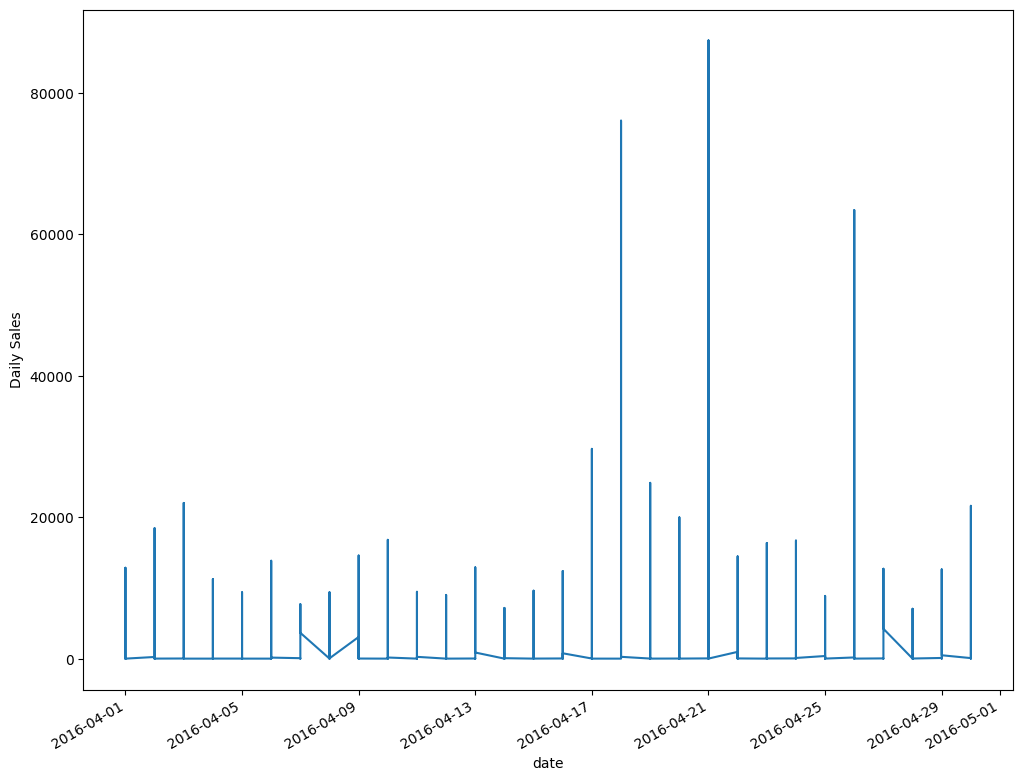

<Figure size 1200x1000 with 0 Axes>

In [74]:
#Through our data gathering we know that A magnitude 7.8 earthquake struck Ecuador on April 16, 2016.
#Lets plot sales before and after the earthquake.
%matplotlib inline
plt.figure(figsize=(12,10))
ax = df.loc['2016-04-01':'2016-04-30', 'sales'].plot()
ax.set_ylabel('Daily Sales');
plt.figure(figsize=(12,10))

###### From the above figure, we can deduce that there was no significant impact on sales due to the earthquake 

### 4. Are certain groups of stores selling more products? (Cluster, city, state, type)

In [75]:
#Lets first find the mean sales by clusters 
pd.options.display.float_format = '{:.2f}'.format
clustersales = df.groupby('cluster')['sales'].agg(['mean'])
clustersales

,mean
cluster,
1.00,327.28
2.00,262.10
3.00,194.93
4.00,297.54
5.00,1120.12
6.00,345.15
7.00,140.35
8.00,648.98
9.00,275.73


<AxesSubplot: xlabel='cluster', ylabel='mean'>

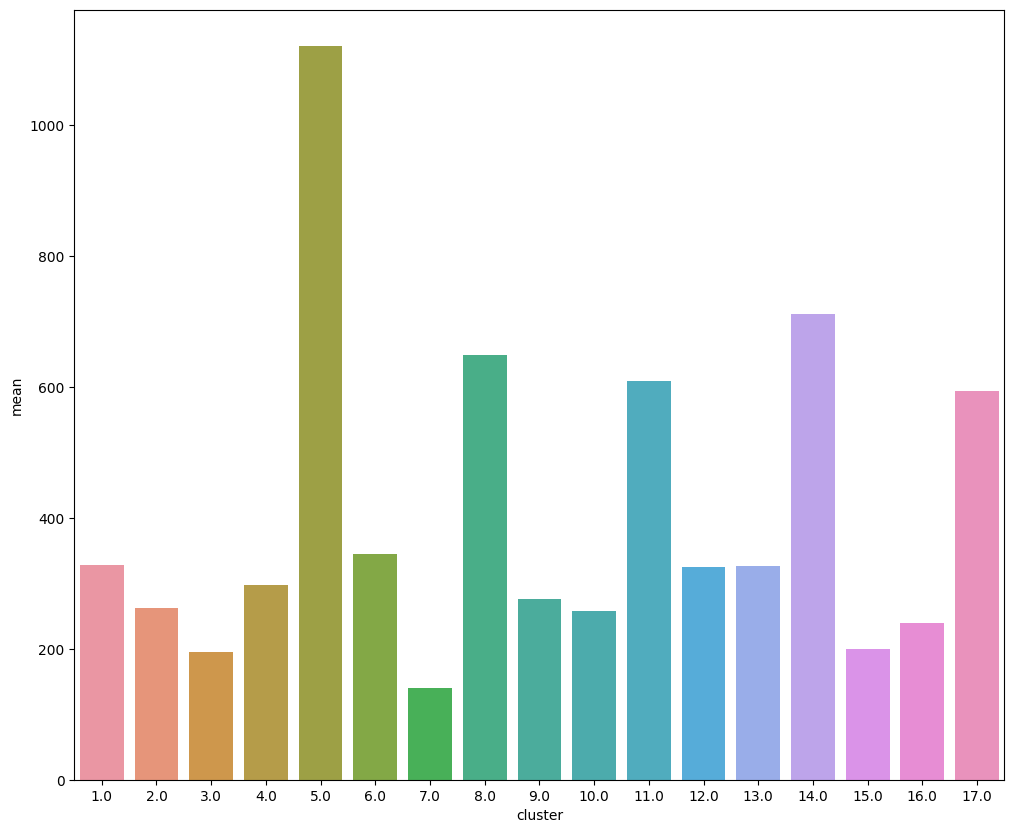

In [76]:
#plotting the average sales of each cluster
clustersales.reset_index(inplace=True)
plt.figure(figsize=(12,10))
sn.barplot(x='cluster', y='mean', data=clustersales)

##### Stores in Cluster 5 are have the highest  average sales. With stores in Cluster 7 having the lowest average sales 

In [77]:
# find the mean sales by city 
pd.options.display.float_format = '{:.2f}'.format
citysales = df.groupby('city')['sales'].agg(['mean'])
citysales

,mean
city,
Ambato,363.85
Babahoyo,320.71
Cayambe,511.06
Cuenca,296.61
Daule,346.57
El Carmen,199.98
Esmeraldas,295.64
Guaranda,235.35
Guayaquil,277.81


<AxesSubplot: xlabel='city', ylabel='mean'>

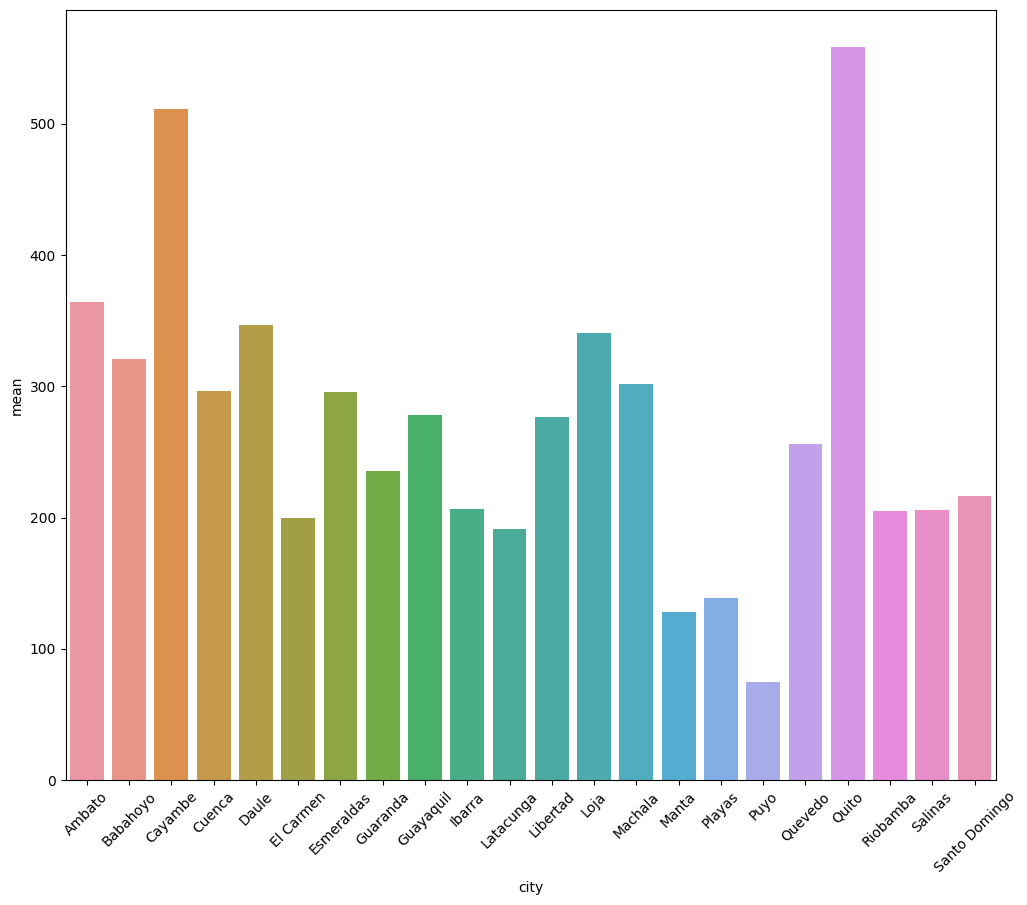

In [78]:
citysales.reset_index(inplace=True)
plt.figure(figsize=(12,10))
plt.xticks(rotation=45)
sn.barplot(x='city', y='mean', data=citysales)

##### Stores in Quito have the highest average sales than any other city

In [79]:
# find the mean sales by city 
pd.options.display.float_format = '{:.2f}'.format
familysales = df.groupby('family')['sales'].agg(['mean'])
familysales

,mean
family,
AUTOMOTIVE,6.13
BABY CARE,0.11
BEAUTY,3.74
BEVERAGES,2397.53
BOOKS,0.07
BREAD/BAKERY,464.66
CELEBRATION,8.43
CLEANING,1075.34
DAIRY,711.95


<AxesSubplot: xlabel='family', ylabel='mean'>

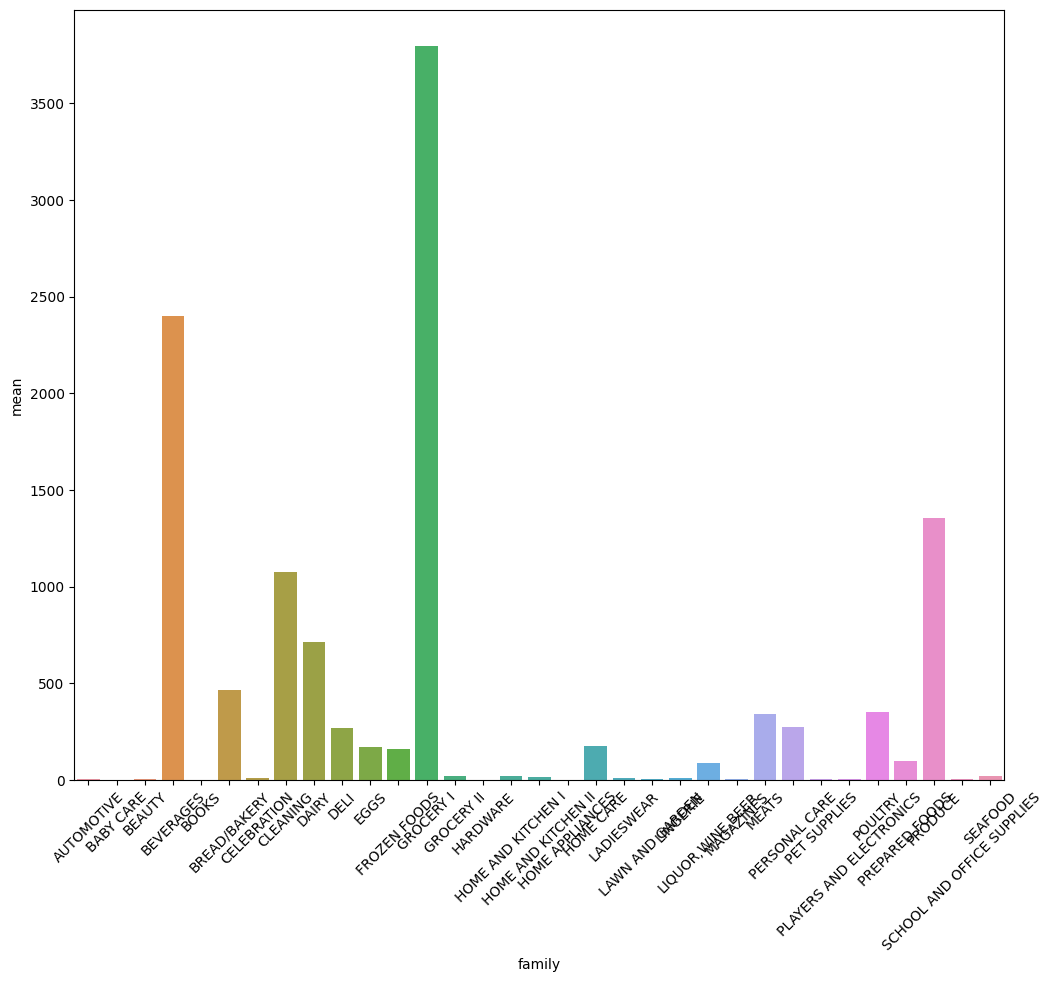

In [80]:
familysales.reset_index(inplace=True)
plt.figure(figsize=(12,10))
plt.xticks(rotation=45)
sn.barplot(x='family', y='mean', data=familysales)

##### On an average, produacts belonging to the Grocery 1 family, sell more than products belonging to any other family. Products belonging to the Books family had the least average sales 

### 5. Are sales affected by promotions, oil prices and holidays?

In [81]:
# Lets first put these columns in a new dataframe (ndf)
ndf = df[['sales', 'onpromotion','daily oil price','day type']]
ndf

,sales,onpromotion,daily oil price,day type
date,,,,
2013-01-01,0.00,0.00,93.14,Holiday
2013-01-01,0.00,0.00,93.14,Holiday
2013-01-01,2.00,0.00,93.14,Holiday
2013-01-01,810.00,0.00,93.14,Holiday
2013-01-01,0.00,0.00,93.14,Holiday
...,...,...,...,...
2016-01-03,748.39,0.00,98.87,Work Day
2016-01-03,143.02,0.00,98.87,Work Day
2016-01-03,3015.56,0.00,98.87,Work Day


C:\Users\GilB\AppData\Local\Temp\ipykernel_20736\2633295981.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ndf.corr()


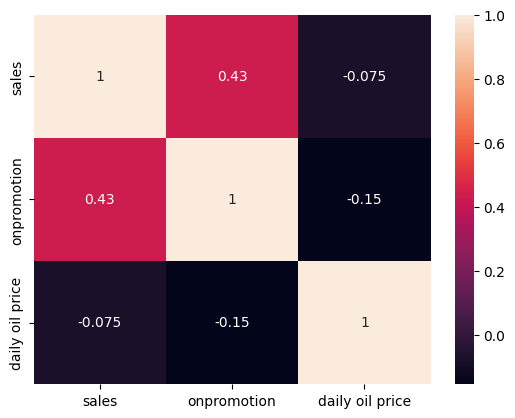

In [82]:
corr_matrix = ndf.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

Text(0.5, 0, 'onpromotion')

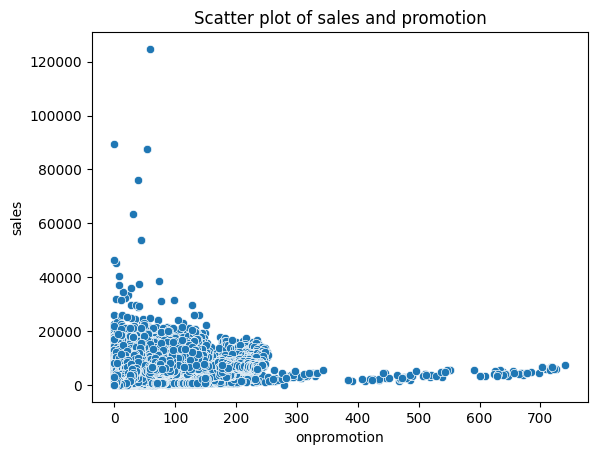

In [83]:
ax = sn.scatterplot(x="onpromotion", y="sales", data=ndf)
ax.set_title("Scatter plot of sales and promotion")
ax.set_xlabel("onpromotion")


##### Sales are not affected by number of items on promotion

Text(0.5, 0, 'daily oil price')

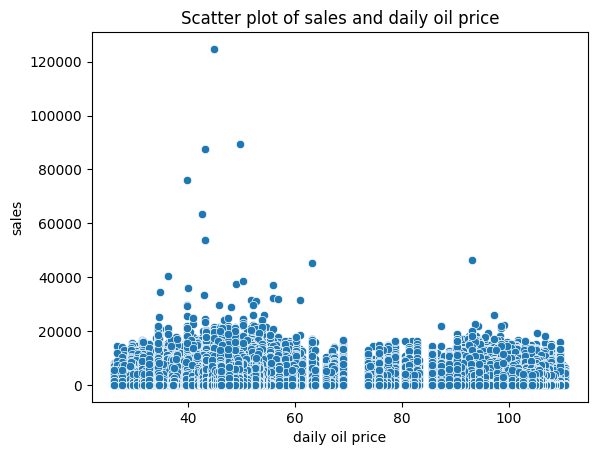

In [84]:
ax = sn.scatterplot(x="daily oil price", y="sales", data=ndf)
ax.set_title("Scatter plot of sales and daily oil price")
ax.set_xlabel("daily oil price")

##### daily oil price does not have an effect on sales 

In [85]:

ndf.drop(['daily oil price', 'onpromotion'], axis=1, inplace= True)
ndf

C:\Users\GilB\AppData\Local\Temp\ipykernel_20736\3153394069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.drop(['daily oil price', 'onpromotion'], axis=1, inplace= True)


,sales,day type
date,,
2013-01-01,0.00,Holiday
2013-01-01,0.00,Holiday
2013-01-01,2.00,Holiday
2013-01-01,810.00,Holiday
2013-01-01,0.00,Holiday
...,...,...
2016-01-03,748.39,Work Day
2016-01-03,143.02,Work Day
2016-01-03,3015.56,Work Day


In [86]:
daytypesales = ndf.groupby('day type')['sales'].agg(['mean'])
daytypesales

,mean
day type,
Additional,523.61
Bridge,489.01
Event,450.70
Holiday,399.29
Transfer,485.74
Work Day,346.93


<AxesSubplot: xlabel='day type', ylabel='mean'>

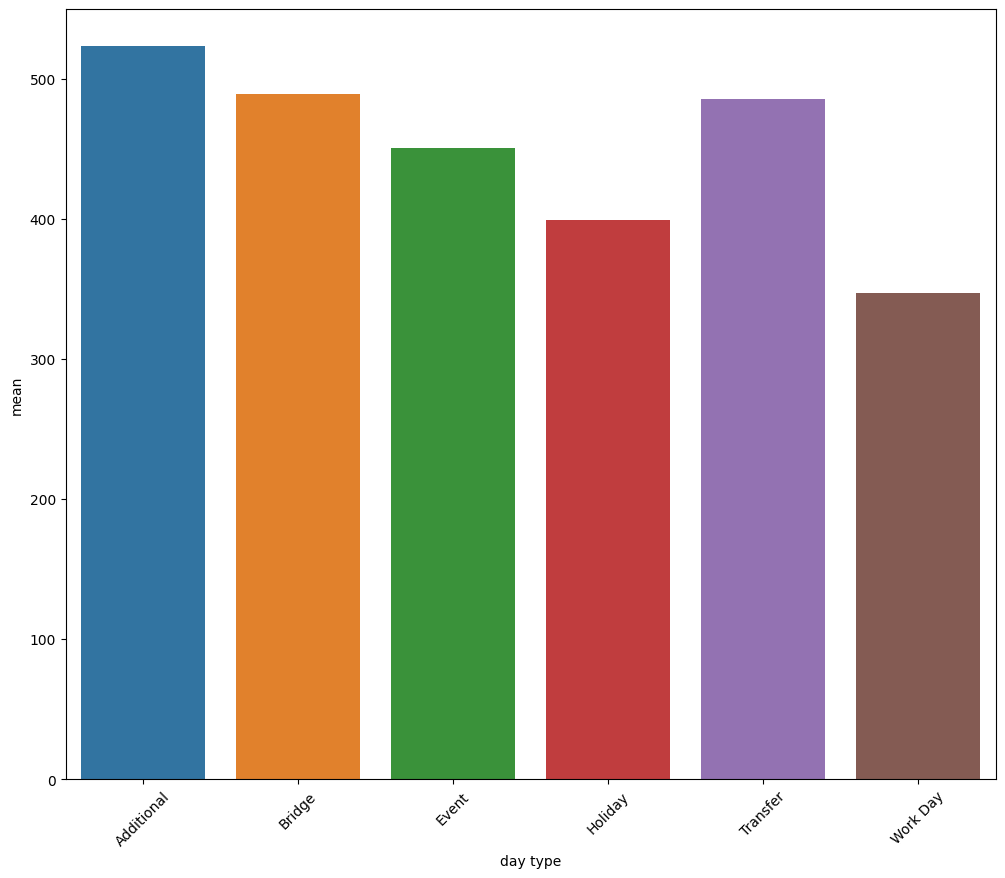

In [87]:
daytypesales.reset_index(inplace=True)
plt.figure(figsize=(12,10))
plt.xticks(rotation=45)
sn.barplot(x='day type', y='mean', data=daytypesales)

## New Features Creation

## Features Encoding




In [88]:
dftrain

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.13,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.55,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.73,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.00,8


In [89]:
dftest

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


## Dataset Splitting

In [90]:
# split data into train and valuation data 
train_data = dftrain[0:29000000]
val_data= dftrain[290000:]

In [91]:
train_data.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0


In [92]:
val_data.head(5)

,id,date,store_nbr,family,sales,onpromotion
290000,290000,2013-06-12,45,PREPARED FOODS,272.90,0
290001,290001,2013-06-12,45,PRODUCE,10.00,0
290002,290002,2013-06-12,45,SCHOOL AND OFFICE SUPPLIES,0.00,0
290003,290003,2013-06-12,45,SEAFOOD,32.68,0
290004,290004,2013-06-12,46,AUTOMOTIVE,17.00,0


In [94]:
dftest.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [96]:
test_size = 1000000
train_df = train_data[:-test_size]
draft_test_df = train_data[-test_size:]

In [98]:
draft_test_df

,id,date,store_nbr,family,sales,onpromotion
2000888,2000888,2016-01-31,5,SEAFOOD,14.95,0
2000889,2000889,2016-01-31,50,AUTOMOTIVE,7.00,0
2000890,2000890,2016-01-31,50,BABY CARE,0.00,0
2000891,2000891,2016-01-31,50,BEAUTY,15.00,0
2000892,2000892,2016-01-31,50,BEVERAGES,6849.00,27
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.13,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.55,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.73,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.00,8


## Features Scaling


## Optional: Train Dataset Balancing 

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

### Train the Model

### Evaluate the Model on the Evaluation dataset (Evalset)

### Predict on a unknown dataset (Testset)

## Simple Model #002

### Create the Model

### Train the Model

### Evaluate the Model on the Evaluation dataset (Evalset)

### Predict on a unknown dataset (Testset)

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.